In [5]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, accuracy_score, recall_score, precision_score, f1_score

# Ejercicio Resuelto - Probabilidad y Estadistica en IA

## Ejercicio 1.

Utilizando Python, implemente un código que utilice el algoritmo de Descenso del Gradiente para realizar una regresión lineal en el conjunto de datos de diabetes.

**Instrucciones:**
1. Cargue el conjunto de datos de diabetes utilizando la función load_diabetes() de sklearn.datasets.
2. Divida los datos en conjuntos de entrenamiento y prueba.
3. Estandarice o normalice los datos para asegurarse de que todas las características tengan una media de 0 y una desviación estándar de 1.
4. Implemente la función de costo para la regresión lineal.
5. Implemente el algoritmo de Descenso del Gradiente para minimizar la función de costo.
6. Grafique cómo cambia la función de costo a medida que avanzan las iteraciones.
7. Evalúe la precisión del modelo en el conjunto de prueba.

In [7]:
from sklearn.datasets import load_diabetes

### Cargar el conjunto de datos.

In [9]:
# Cargar datos
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)

### Dividir los datos en entrenamiento y prueba.

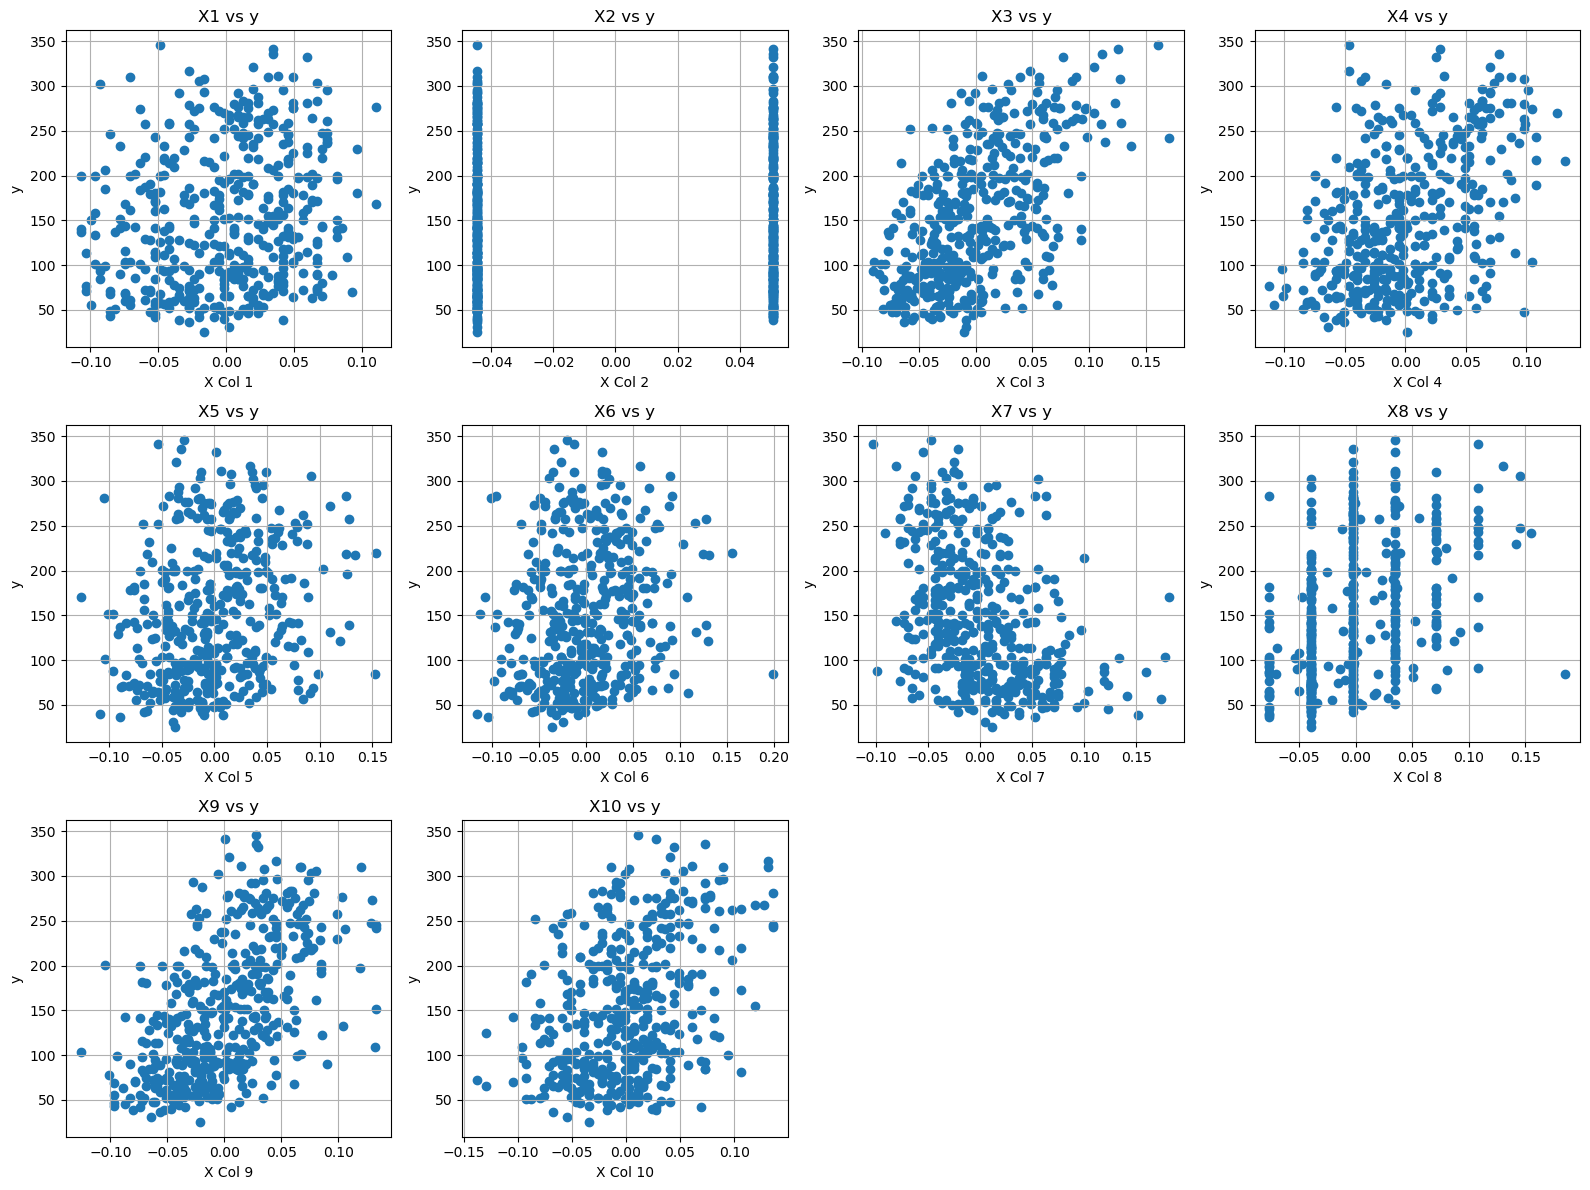

In [11]:
num_cols = X.shape[1]
# Determina el número de filas y columnas para los subplots
# Por ejemplo, 4 columnas por fila
cols_per_row = 4
rows = int(np.ceil(num_cols / cols_per_row))

fig, axes = plt.subplots(rows, cols_per_row, figsize=(4 * cols_per_row, 4 * rows))
axes = axes.flatten() # Aplana la matriz de ejes para facilitar la iteración

for i in range(num_cols):
    axes[i].scatter(X[:, i], y)
    axes[i].set_title(f'X{i+1} vs y')
    axes[i].set_xlabel(f'X Col {i+1}')
    axes[i].set_ylabel('y')
    axes[i].grid(True)

# Oculta los subplots vacíos si el número de columnas no llena completamente la última fila
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [13]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalizar los datos.

In [15]:
# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Implementar la función de costo.

In [17]:
# Función de costo
def cost_function(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

### Implementar el algoritmo de Descenso del Gradiente.

In [7]:

# Descenso del Gradiente
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cost_function(X, y, theta)
    
    return theta, cost_history

### Graficar la función de costo.

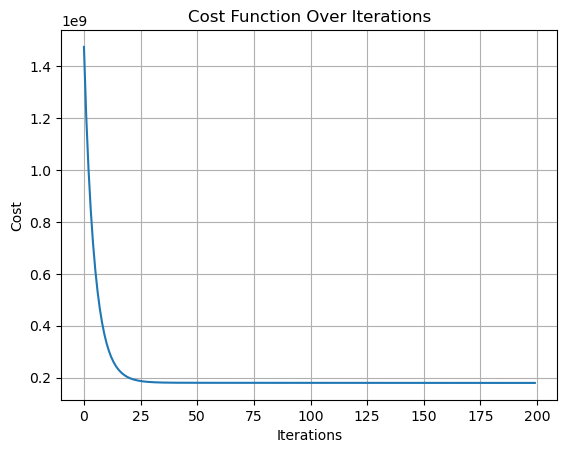

(array([[153.7365438 ],
        [  1.93603855],
        [-11.43465264],
        [ 26.26083555],
        [ 16.61093866],
        [-10.26547966],
        [ -2.0210608 ],
        [ -7.49199789],
        [  8.29111024],
        [ 22.08805776],
        [  2.59975166]]),
 180049287.1689323)

In [8]:
# Añadir columna de unos para el término de intercepción
X_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]

# Inicializar theta
theta = np.random.randn(X_b.shape[1], 1)

# Configuración del algoritmo
iterations = 200
learning_rate = 0.1

# Ejecutar el descenso del gradiente
theta_final, cost_history = gradient_descent(X_b, y_train, theta, learning_rate, iterations)

# Graficar la evolución del costo
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.grid(True)
plt.show()

theta_final, cost_history[-1]

### Evaluar la precisión del modelo en el conjunto de prueba.

In [9]:
X_test_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]
y_pred = X_test_b.dot(theta_final)

r2 = r2_score(y_test, y_pred)
r2

0.4553242033124415

El coeficiente de determinación $R^2$ para el modelo de regresión lineal en el conjunto de prueba es aproximadamente 0.455. Esto indica que el modelo explica aproximadamente el 45.5% de la variabilidad de los datos de respuesta. Aunque no es un resultado excepcionalmente alto, es un punto de partida para entender el comportamiento del modelo con estos datos y la implementación del descenso del gradiente.

## Ejercicio 2.

Similar al ejercicio anterior, implemente un código donde a través del algoritmo de Descenso del Gradiente realice una regresión logística en el conjunto de datos de diagnóstico de cáncer de mama.

**Instrucciones:**
1. Cargue el conjunto de datos de diagnóstico de cáncer de mama utilizando la función load_breast_cancer() de sklearn.datasets.
2. Divida los datos en conjuntos de entrenamiento y prueba.
3. Estándarice o normalice los datos para asegurarse de que todas las características tengan una media de 0 y una desviación estándar de 1.
4. Implemente la función sigmoide que se necesita para la regresión logística.
5. Implemente la función de costo para la regresión logística.
6. Implemente el algoritmo de Descenso del Gradiente para minimizar la función de costo.
7. Grafique cómo cambia la función de costo a medida que avanzan las iteraciones.
8. Evalúe la precisión del modelo en el conjunto de prueba usando una métrica de clasificación (por ejemplo, precisión, exhaustividad, F1-score).

In [10]:
from sklearn.datasets import load_breast_cancer

### Cargar el conjunto de datos usando load_breast_cancer de sklearn.datasets.

In [11]:
data_bc = load_breast_cancer()
X_bc = data_bc.data
y_bc = data_bc.target.reshape(-1, 1)

### Dividir los datos en conjuntos de entrenamiento y prueba.

In [12]:
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

### Normalizar los datos para asegurarnos de que todas las características tengan una media de 0 y una desviación estándar de 1.

In [13]:
scaler_bc = StandardScaler()
X_train_bc_scaled = scaler_bc.fit_transform(X_train_bc)
X_test_bc_scaled = scaler_bc.transform(X_test_bc)

### Implementar la función sigmoide necesaria para la regresión logística.

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Implementar la función de costo para la regresión logística.

In [15]:
def logistic_cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # para evitar log(0)
    return -(1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

### Implementar el Descenso del Gradiente para minimizar la función de costo.

In [16]:
def logistic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=200):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = sigmoid(X @ theta)
        gradient = (1 / m) * X.T @ (predictions - y)
        theta -= learning_rate * gradient
        cost_history[i] = logistic_cost_function(X, y, theta)

    return theta, cost_history

### Graficar cómo cambia la función de costo a medida que avanzan las iteraciones.

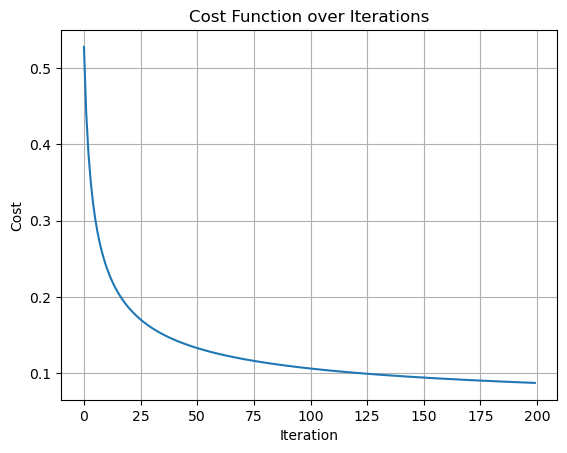

In [17]:
# Añadir intercepto
X_train_bc_b = np.c_[np.ones((X_train_bc_scaled.shape[0], 1)), X_train_bc_scaled]
theta_bc = np.zeros((X_train_bc_b.shape[1], 1))

# Parámetros para el descenso del gradiente
learning_rate = 0.1
iterations = 200

# Realizar el descenso del gradiente
theta_optimal_bc, cost_history_bc = logistic_gradient_descent(X_train_bc_b, y_train_bc, theta_bc, learning_rate, iterations)

# Graficar la función de costo
plt.plot(cost_history_bc)
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

### Evaluar la precisión del modelo en el conjunto de prueba usando varias métricas de clasificación.

In [18]:
# Predicción en el conjunto de prueba
X_test_bc_b = np.c_[np.ones((X_test_bc_scaled.shape[0], 1)), X_test_bc_scaled]
y_pred_bc = sigmoid(X_test_bc_b @ theta_optimal_bc) >= 0.5

# Evaluación de métricas
accuracy_bc = accuracy_score(y_test_bc, y_pred_bc)
recall_bc = recall_score(y_test_bc, y_pred_bc)
precision_bc = precision_score(y_test_bc, y_pred_bc)
f1_score_bc = f1_score(y_test_bc, y_pred_bc)

print("Optimal Theta: \n", theta_optimal_bc)
print("Acuracy: \n", accuracy_bc)
print("Recall: \n", recall_bc)
print("Precision: \n", precision_bc)
print("F1 Score: \n", f1_score_bc)

Optimal Theta: 
 [[ 0.44476654]
 [-0.44102651]
 [-0.46789517]
 [-0.43378574]
 [-0.44500439]
 [-0.17355925]
 [-0.08932171]
 [-0.36194305]
 [-0.48983044]
 [-0.08598361]
 [ 0.19965749]
 [-0.44446592]
 [-0.013615  ]
 [-0.35396439]
 [-0.3861024 ]
 [-0.03512281]
 [ 0.20762918]
 [ 0.11325453]
 [-0.04626789]
 [ 0.11609656]
 [ 0.26894804]
 [-0.54890235]
 [-0.59346014]
 [-0.51387874]
 [-0.52267995]
 [-0.40221994]
 [-0.21422453]
 [-0.37182245]
 [-0.48773046]
 [-0.41483507]
 [-0.10432463]]
Acuracy: 
 0.9912280701754386
Recall: 
 1.0
Precision: 
 0.9861111111111112
F1 Score: 
 0.993006993006993


El gráfico muestra cómo la función de costo disminuye con cada iteración, indicando que el algoritmo de descenso del gradiente está funcionando correctamente y converge hacia el mínimo.

Los valores de precisión, exhaustividad, precisión y F1 son excepcionales, demostrando que el modelo de regresión logística tiene un desempeño muy alto en clasificar correctamente los casos del conjunto de datos de diagnóstico de cáncer de mama. Estos resultados son indicativos de un modelo muy efectivo.